In [28]:
## first softmax version
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
# Cell 1: Import the module
from gp_softmax_torch_works_play_matrprev import *
## first softmax version
%load_ext autoreload
%autoreload 2
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Generate synthetic data
N = 100  # Number of individuals
D = 5    # Number of diseases
T = 50   # Number of time points
P = 5    # Number of genetic covariates
n_lengths = 2  # Number of length scales
n_amplitudes = 2  # Number of amplitudes
K=3
torch.manual_seed(42)
np.random.seed(42)
# 1. Generate synthetic data with true parameters
true_data = generate_synthetic_data(N=N, D=D, T=T, K=K, P=P, return_true_params=True)
Y = true_data['Y']
G = true_data['G']
prevalence_t = compute_smoothed_prevalence(Y, window_size=5)
event_times = true_data['event_times']
true_pi = true_data['pi']
prevalence_t.shape



(5, 50)

/opt/miniconda3/envs/pyro_env/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Epoch 0
Loss: 12332.4717
Loss change: inf
Mean phi deviation: 0.0450
Phi gradient mean: 725.0525
Learning rates: ['1.00e-03', '5.00e-04', '1.00e-04', '1.00e-04', '1.00e-03']

Parameter evolution from grid points:

Lambda kernels:
Topic 0:
  Length: 6.2 → 6.2
  Amplitude: 0.4 → 0.4
Topic 1:
  Length: 12.5 → 12.5
  Amplitude: 0.4 → 0.4
Topic 2:
  Length: 25.0 → 25.0
  Amplitude: 0.4 → 0.4
Topic 3:
  Length: 50.0 → 50.0
  Amplitude: 0.4 → 0.4

Phi kernels:
Topic 0:
  Length: 6.2 → 6.2
  Amplitude: 0.4 → 0.4
Topic 1:
  Length: 12.5 → 12.5
  Amplitude: 0.4 → 0.4
Topic 2:
  Length: 25.0 → 25.0
  Amplitude: 0.4 → 0.4
Topic 3:
  Length: 50.0 → 50.0
  Amplitude: 0.4 → 0.4
Average kernel computation time: 0.0007s

Epoch 100
Loss: 3010.3760
Loss change: 1.7725
Mean phi deviation: 0.0450
Phi gradient mean: 4.1754
Learning rates: ['1.00e-03', '5.00e-04', '1.00e-04', '1.00e-04', '1.00e-03']

Parameter evolution from grid points:

Lambda kernels:
Topic 0:
  Length: 6.2 → 6.2
  Amplitude: 0.4 → 0.4
T

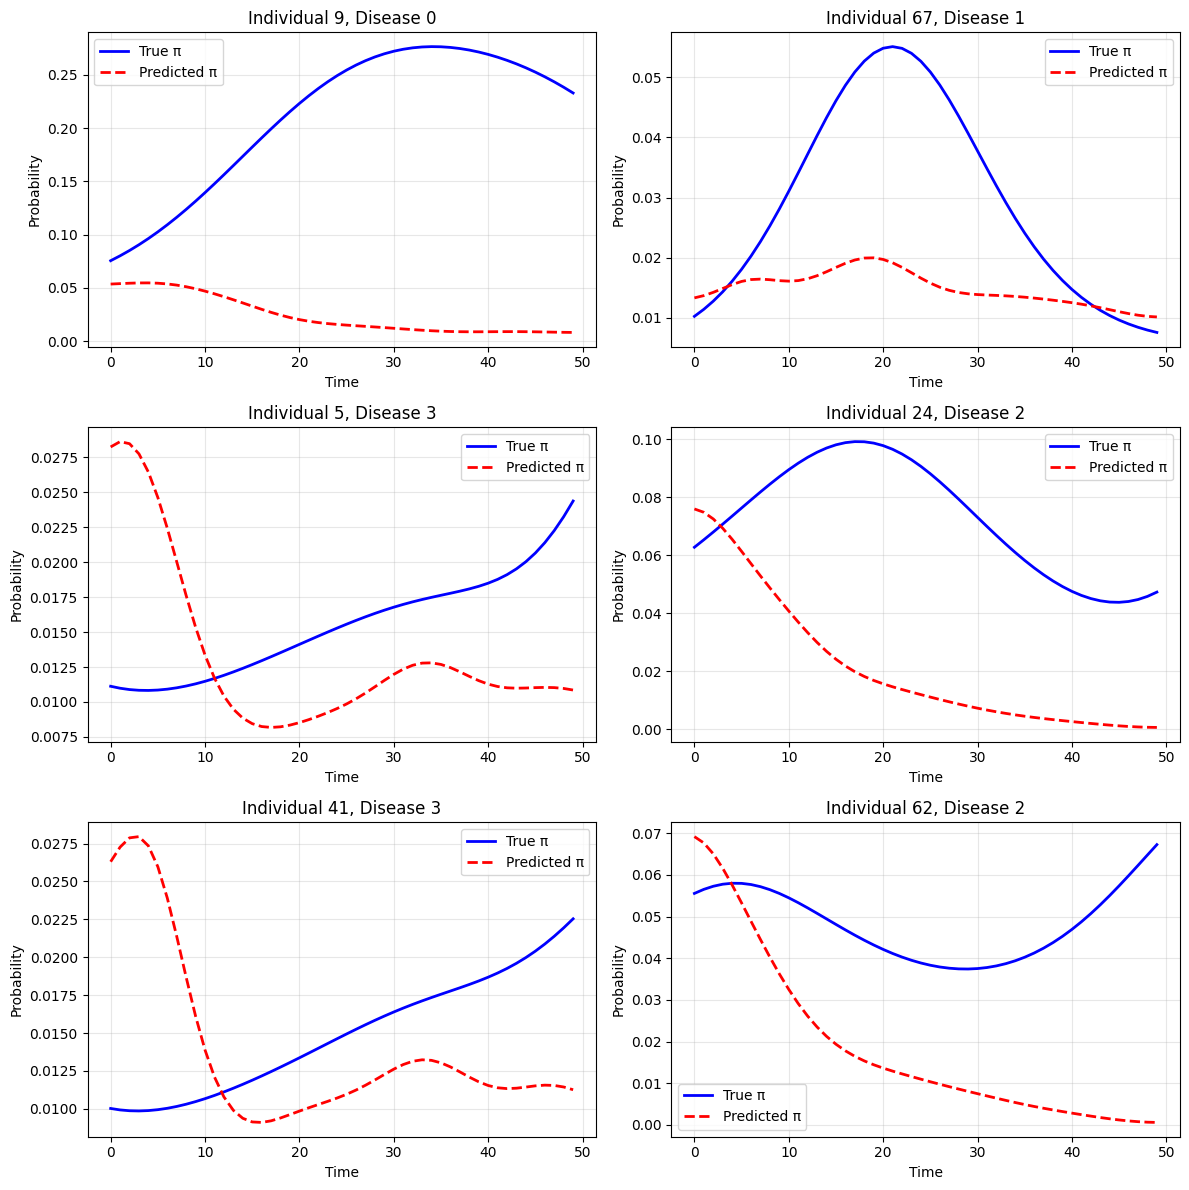

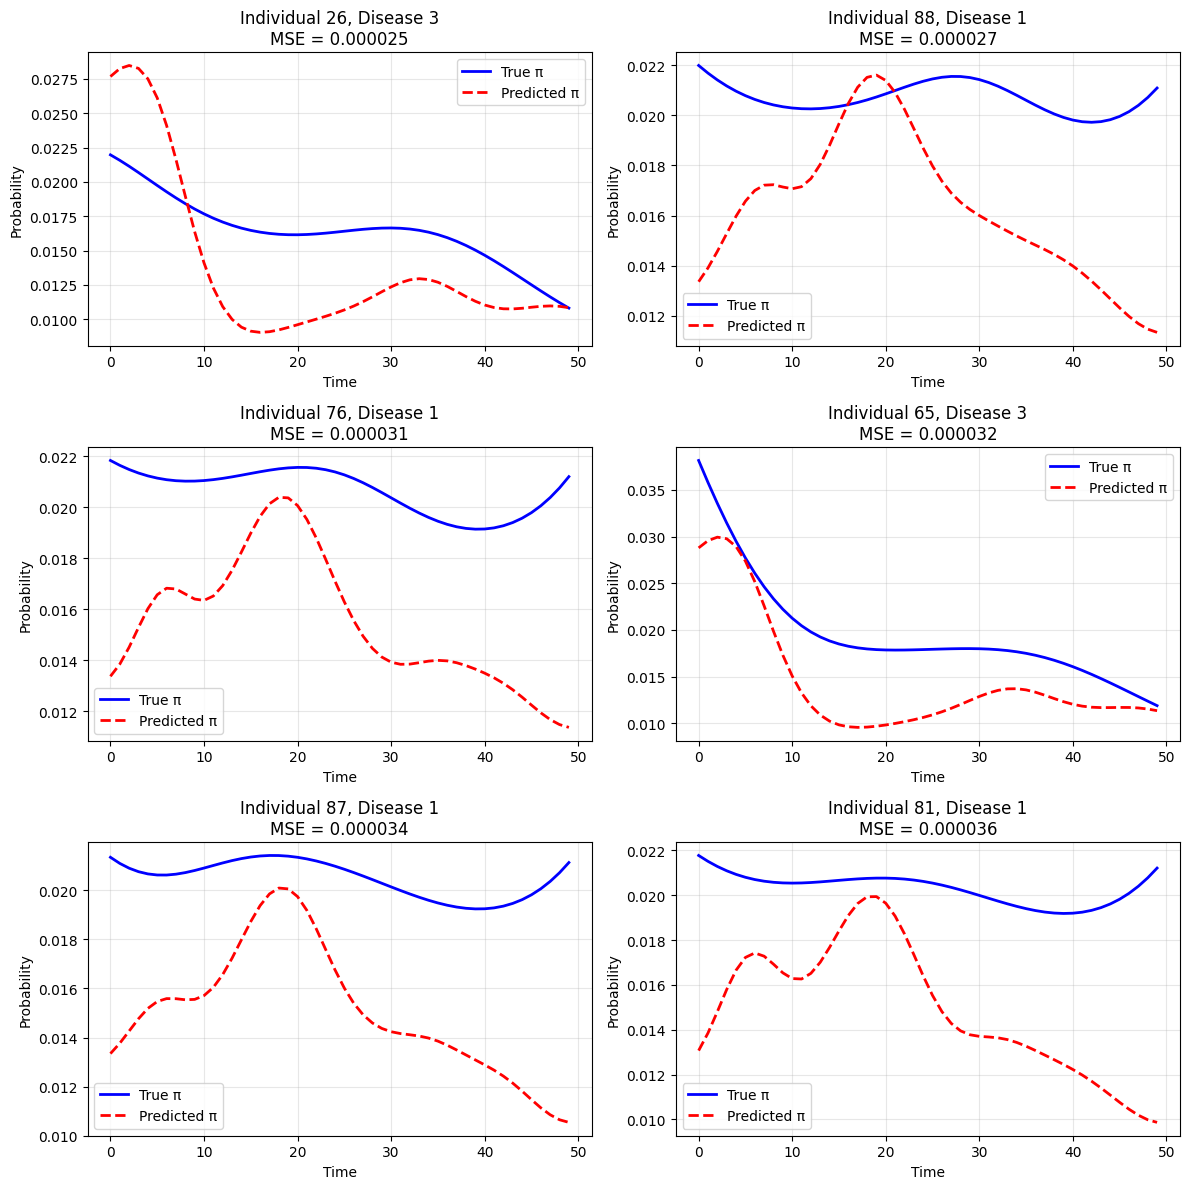

In [30]:
# Initialize model
model = AladynSurvivalModel(
    N=N, D=D, T=T, P=P,
    G=true_data['G'],
    Y=true_data['Y']
)

# Train model
history = model.fit(
    event_times=true_data['event_times'],
    num_epochs=5000,
    learning_rate=1e-3,
    lambda_reg=1e-2
)

# Plot results
plot_random_comparisons(true_data['pi'], model.forward()[0], n_samples=6)
plot_best_matches(true_data['pi'], model.forward()[0], n_samples=6)





Epoch 0
Loss: 2233.8652
Loss change: inf
Mean phi deviation: 0.0571
Phi gradient mean: 5.0098
Learning rates: ['1.00e-03', '5.00e-04', '1.00e-04', '1.00e-04', '1.00e-03']

Parameter evolution from grid points:

Lambda kernels:
Topic 0:
  Length: 6.2 → 6.1
  Amplitude: 0.4 → 0.4
Topic 1:
  Length: 12.5 → 12.4
  Amplitude: 0.4 → 0.4
Topic 2:
  Length: 25.0 → 24.9
  Amplitude: 0.4 → 0.4
Topic 3:
  Length: 50.0 → 49.9
  Amplitude: 0.4 → 0.4

Phi kernels:
Topic 0:
  Length: 6.2 → 6.1
  Amplitude: 0.4 → 0.4
Topic 1:
  Length: 12.5 → 12.4
  Amplitude: 0.4 → 0.4
Topic 2:
  Length: 25.0 → 24.9
  Amplitude: 0.4 → 0.4
Topic 3:
  Length: 50.0 → 49.9
  Amplitude: 0.4 → 0.4
Average kernel computation time: 0.0003s

Converged at epoch 56. Loss change: 0.2981


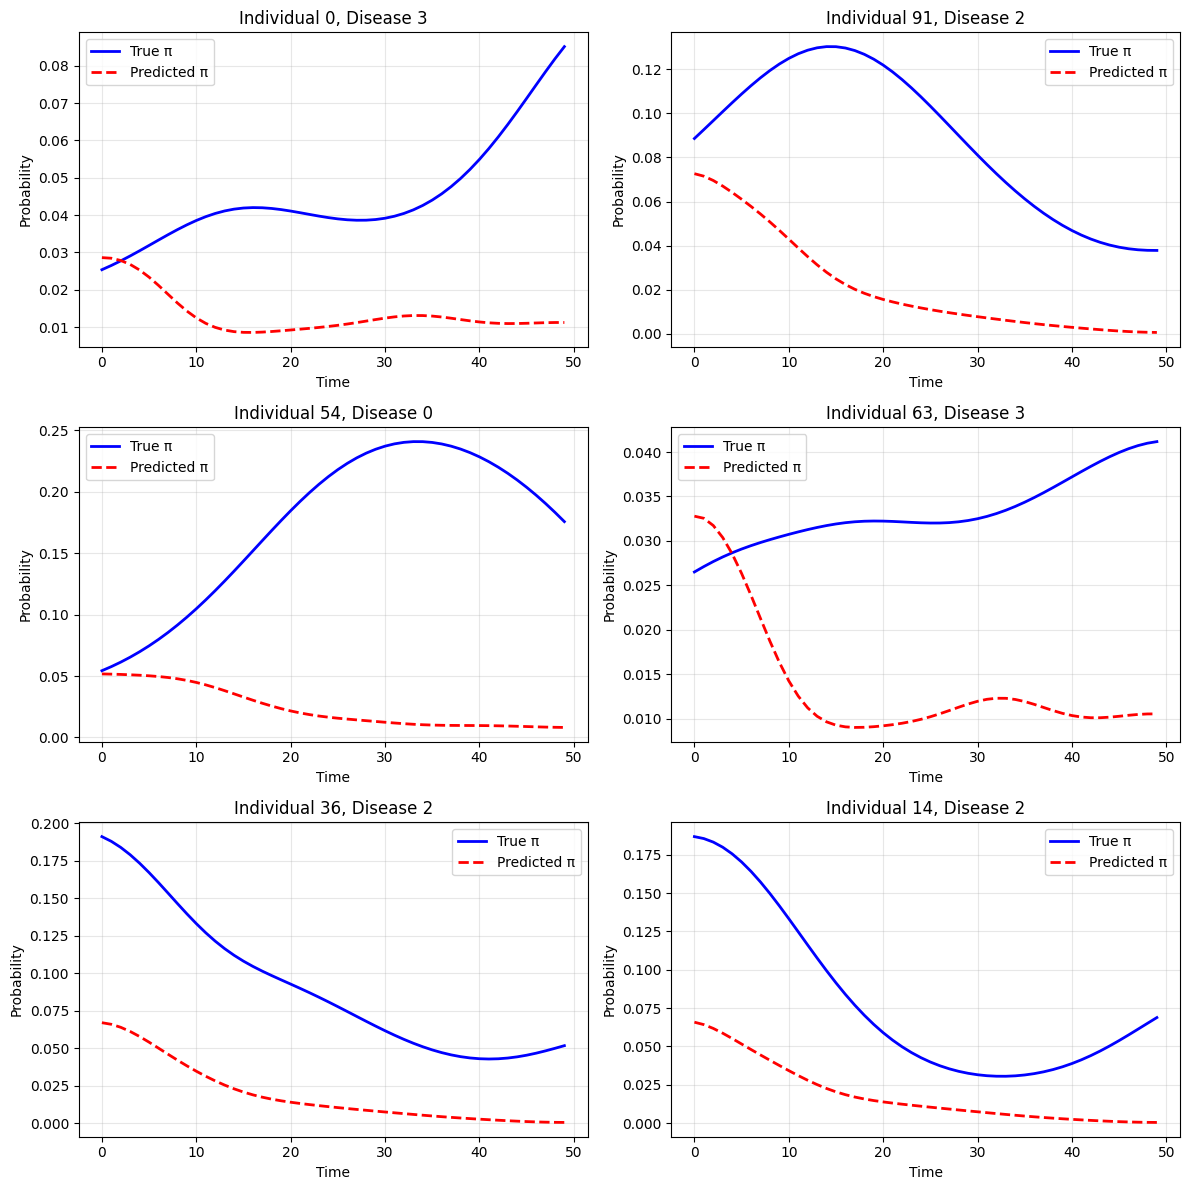

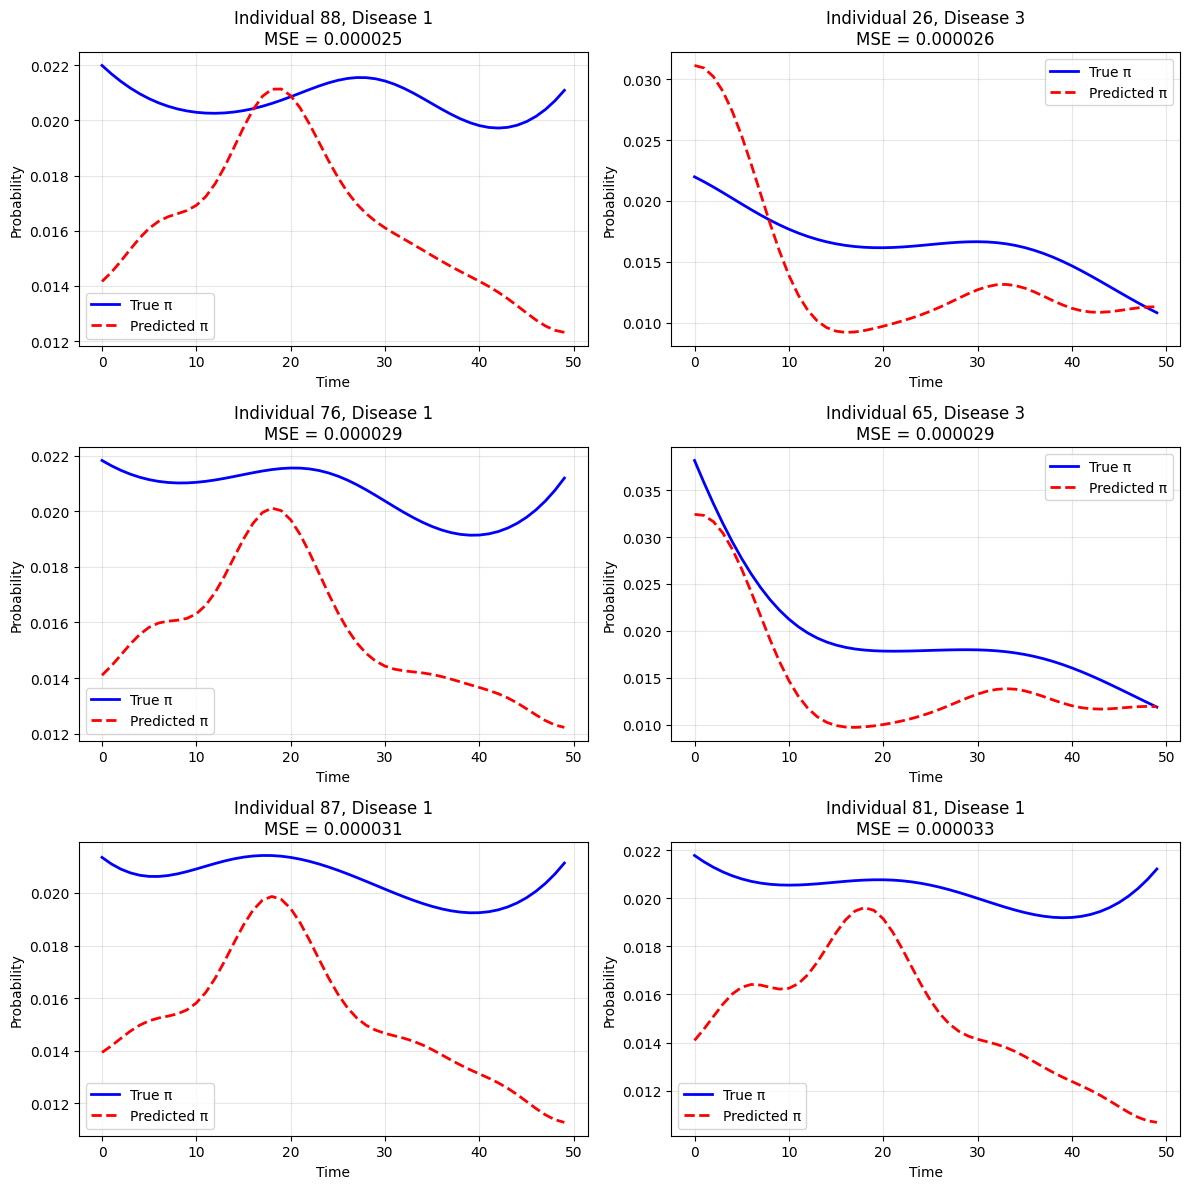

In [32]:
# Train model
history = model.fit(
    event_times=true_data['event_times'],
    num_epochs=5000,
    learning_rate=1e-3,
    lambda_reg=1e-2,
    convergence_threshold=1,
    patience=50
)

# Plot results
plot_random_comparisons(true_data['pi'], model.forward()[0], n_samples=6)
plot_best_matches(true_data['pi'], model.forward()[0], n_samples=6)